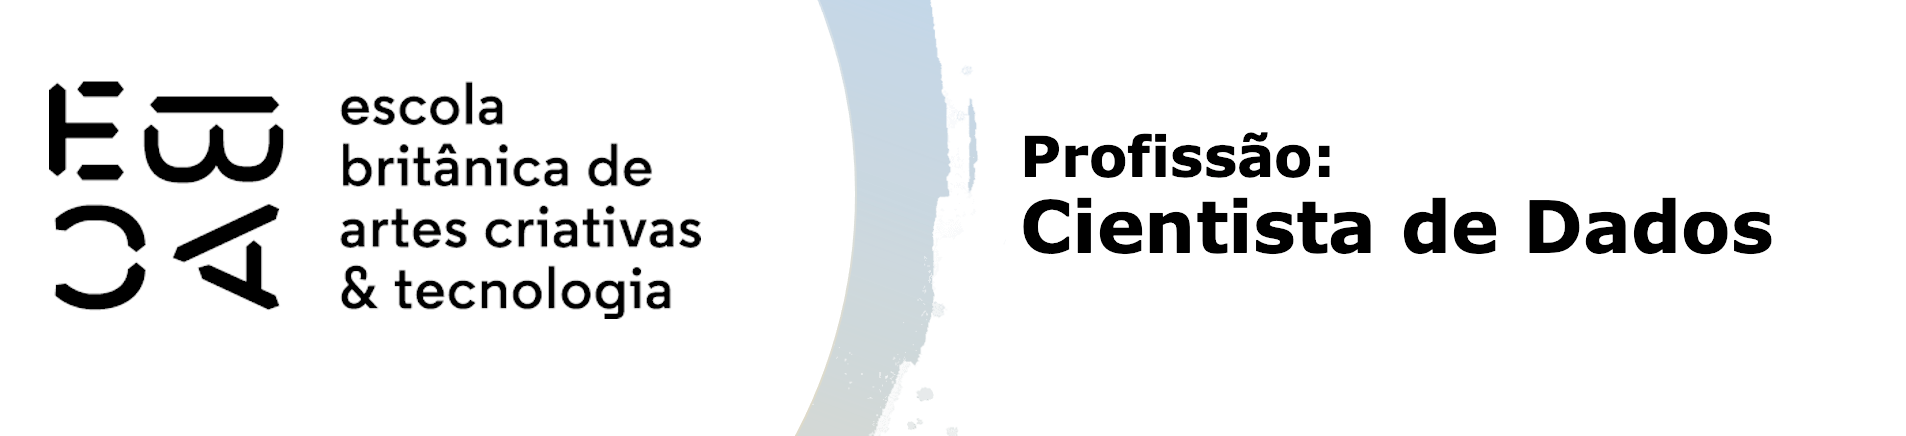

# Métodos hierárquicos de agrupamento - Tarefa

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

##### 1. Selecione as variáveis quantitativas da base de pinguins

In [128]:
# Carregando conjunto de dados.
df = sns.load_dataset('penguins')

# Apenas colunas numéricas.
df_num = df.select_dtypes(include='number')
df_num.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


##### 2. Elimine valores faltantes

In [129]:
# Verificando se existem valores faltantes.
df_num.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [130]:
# Linhas com os valores faltantes.
display(df_num[df_num.isna().any(axis=1)])

# Remover valores faltantes.
df_num.dropna(inplace=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [131]:
df_num.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

##### 3. Padronize as variáveis para média zero e desvio padrão 1

In [132]:
# StandardScaler será utilizado para padronização dos dados.
scaler = StandardScaler()
df_num_pad = scaler.fit_transform(df_num)

# Transformando nddarray em DataFrame
df_num_pad = pd.DataFrame(df_num_pad, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
df_num_pad.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532


##### 4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos

In [133]:
clustering = AgglomerativeClustering(n_clusters=3,
                                     linkage='complete', 
                                     distance_threshold=None)
clustering.fit(df_num_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [134]:
# Criamos uma nova coluna 'grupo', que armazena os grupos gerados pelo modelo.
df_num['grupo'] = clustering.labels_
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,0


##### 5. Faça o Dendrograma

Text(0.5, 1.0, 'Dendrograma Hierárquico "df_num_pad"')

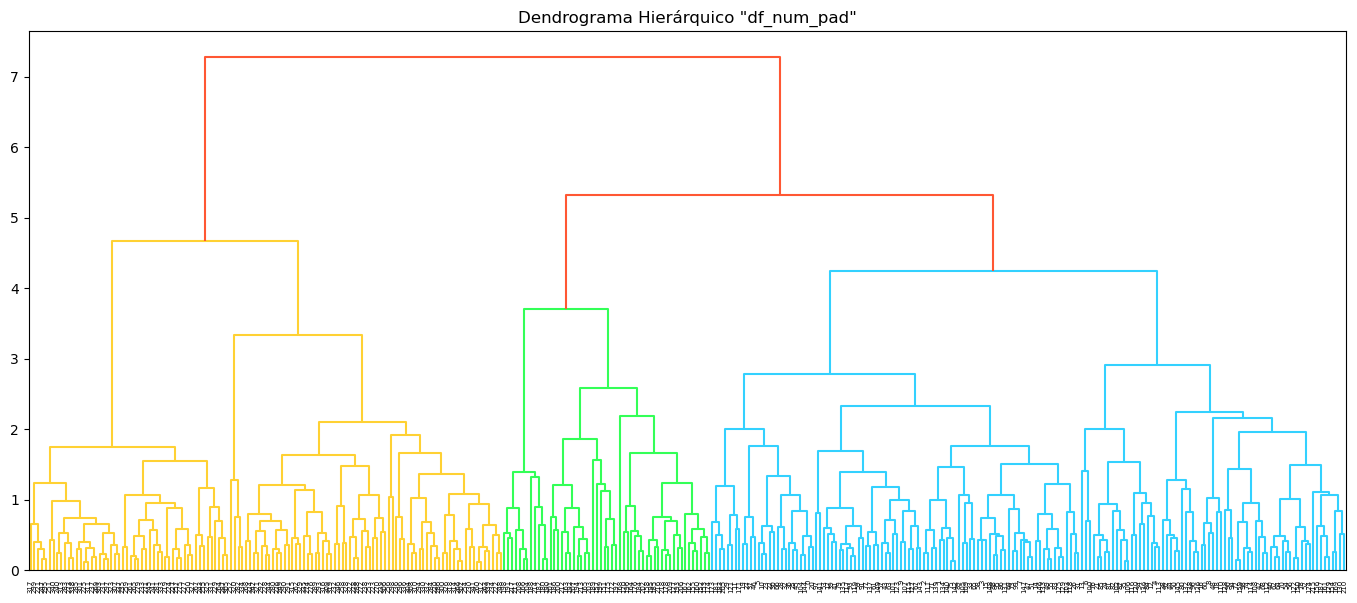

In [135]:
plt.figure(figsize=(17, 7))
dend = shc.dendrogram(shc.linkage(df_num_pad, method='complete'))
plt.title('Dendrograma Hierárquico "df_num_pad"')

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [136]:
num_grupos  = df_num.groupby(['grupo'])['grupo'].count()

for ind, val in enumerate(num_grupos):
    print(f'Grupo {ind} : {val} pinguins')

Grupo 0 : 123 pinguins
Grupo 1 : 165 pinguins
Grupo 2 : 54 pinguins


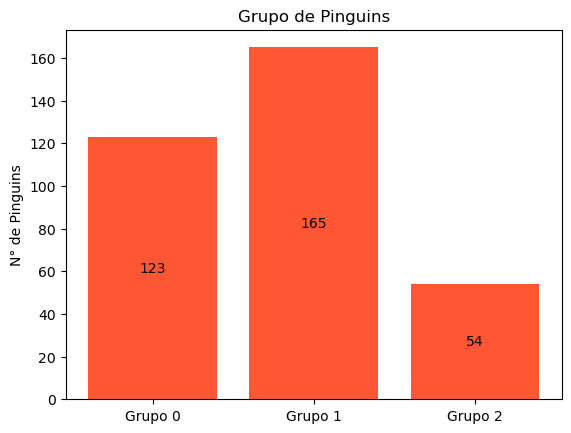

In [137]:
ax = plt.bar(['Grupo 0', 'Grupo 1', 'Grupo 2'], num_grupos)
plt.ylabel('N° de Pinguins')
plt.title('Grupo de Pinguins')

# Obtendo o objeto de eixo associado ao gráfico de barras
ax = plt.gca()

# Adicionando anotações
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(int(height), (x + width/2, y + height/2), ha='center', va='center')

# Exibindo o gráfico
plt.show()

In [138]:
cross_tab = pd.crosstab(df['species'], df_num['grupo'])
cross_tab

grupo,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [139]:
cross_tab.columns

Index([0, 1, 2], dtype='int64', name='grupo')

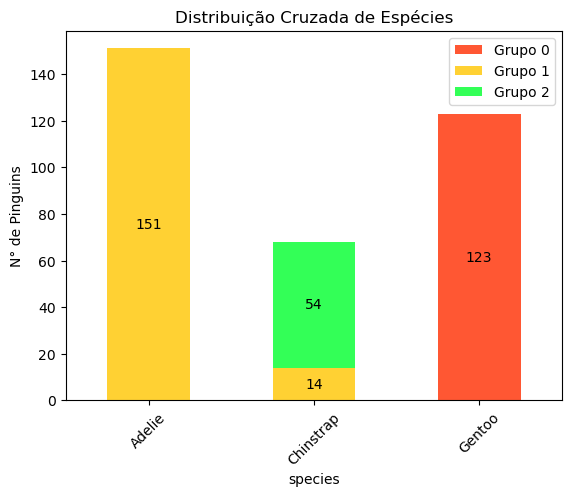

In [140]:
ax = cross_tab.plot(kind='bar', stacked=True)
plt.ylabel('N° de Pinguins')
plt.title('Distribuição Cruzada de Espécies')

plt.legend(labels=[f'Grupo {grupo}' for grupo in cross_tab.columns])

plt.xticks(rotation=45)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(int(height), (x + width/2, y + height/2), ha='center', va='center')

C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

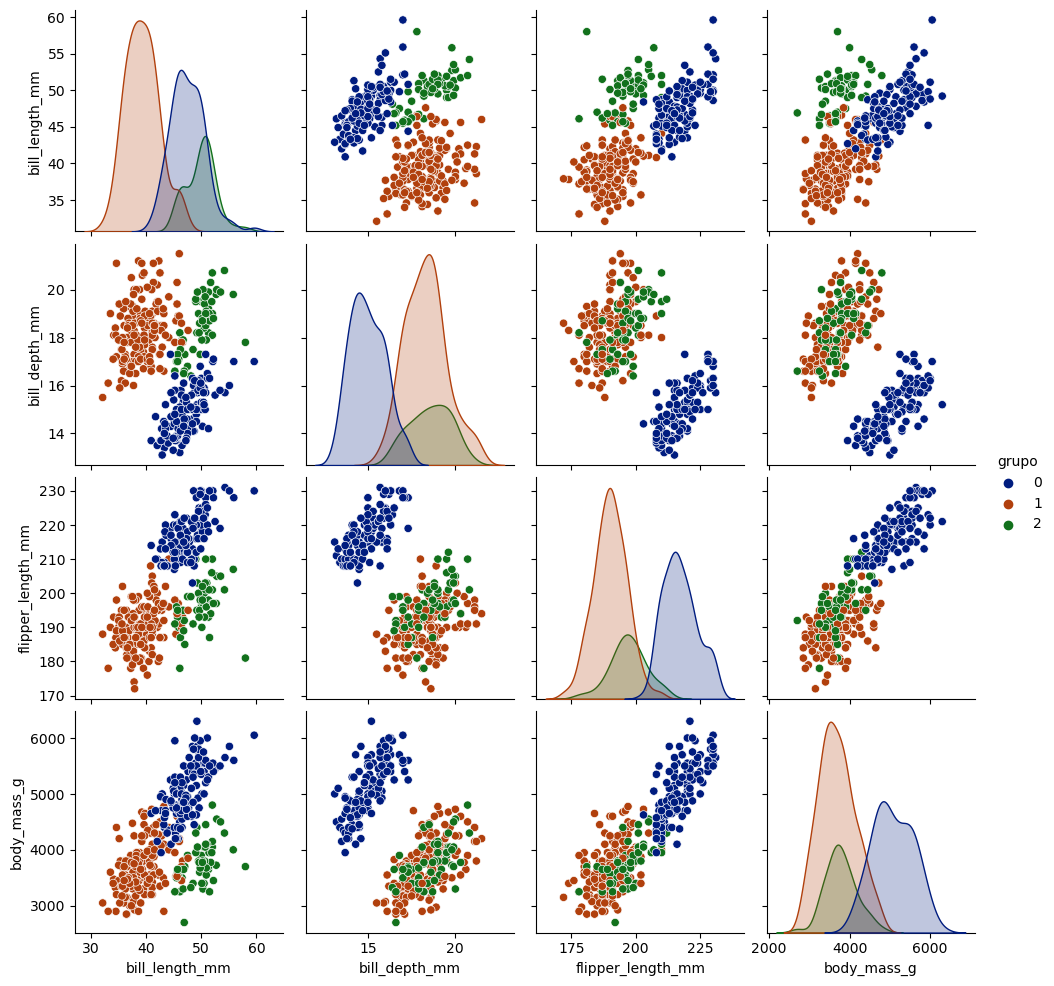

In [141]:
sns.pairplot(data=df_num, hue='grupo', palette='dark')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [142]:
clustering = AgglomerativeClustering(n_clusters=5,
                                     linkage='complete', 
                                     distance_threshold=None)
clustering.fit(df_num_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [144]:
# Criamos uma nova coluna 'subgrupo', que armazena os grupos gerados pelo modelo.
df_num['subgrupo'] = clustering.labels_
df_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,subgrupo
0,39.1,18.7,181.0,3750.0,1,4
1,39.5,17.4,186.0,3800.0,1,4
2,40.3,18.0,195.0,3250.0,1,4


In [147]:
num_grupos  = df_num.groupby(['subgrupo'])['subgrupo'].count()

for ind, val in enumerate(num_grupos):
    print(f'subgrupo {ind} : {val} pinguins')

subgrupo 0 : 54 pinguins
subgrupo 1 : 71 pinguins
subgrupo 2 : 69 pinguins
subgrupo 3 : 52 pinguins
subgrupo 4 : 96 pinguins


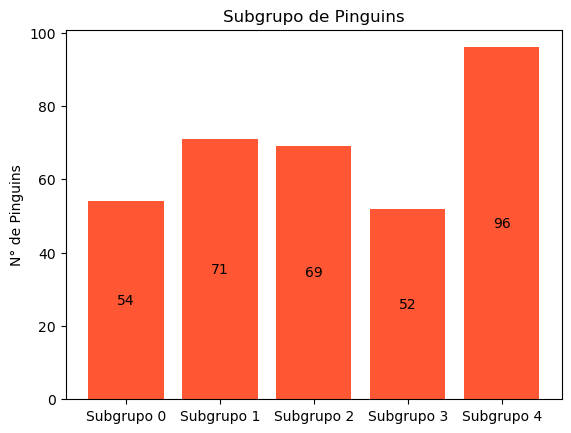

In [148]:
# Criar rótulos dos subgrupos.
rotulos = [f'Subgrupo {grupo}' for grupo in num_grupos.index]

ax = plt.bar(rotulos, num_grupos)
plt.ylabel('N° de Pinguins')
plt.title('Subgrupo de Pinguins')

# Obtendo o objeto de eixo associado ao gráfico de barras
ax = plt.gca()

# Adicionando anotações
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(int(height), (x + width/2, y + height/2), ha='center', va='center')

# Exibindo o gráfico
plt.show()

In [155]:
# Adicionando colunas 'sex', 'species' de df em df_num como df_merg
df_merg = df_num.merge(right=df[['sex', 'species']], how='left', left_index=True, right_index=True)
df_merg

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,subgrupo,sex,species
0,39.1,18.7,181.0,3750.0,1,4,Male,Adelie
1,39.5,17.4,186.0,3800.0,1,4,Female,Adelie
2,40.3,18.0,195.0,3250.0,1,4,Female,Adelie
4,36.7,19.3,193.0,3450.0,1,4,Female,Adelie
5,39.3,20.6,190.0,3650.0,1,2,Male,Adelie
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,3,Female,Gentoo
340,46.8,14.3,215.0,4850.0,0,3,Female,Gentoo
341,50.4,15.7,222.0,5750.0,0,1,Male,Gentoo
342,45.2,14.8,212.0,5200.0,0,3,Female,Gentoo


In [165]:
count_subgrupo = (df_merg[['subgrupo', 'sex']].value_counts().unstack().fillna(0).astype(int))
print(f'Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?')
count_subgrupo

Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?


sex,Female,Male
subgrupo,,
0,20,34
1,9,61
2,13,55
3,49,0
4,74,18


In [163]:
# Calcular a tabela cruzada.
cross_tab = pd.crosstab(index=[df_merg['subgrupo'], df_merg['sex']], columns=df_merg['species'])
cross_tab = cross_tab.unstack().fillna(0)
cross_tab

species  Adelie       Chinstrap       Gentoo      
sex      Female  Male    Female  Male Female  Male
subgrupo                                          
0           0.0   0.0      20.0  34.0    0.0   0.0
1           0.0   0.0       0.0   0.0    9.0  61.0
2           4.0  55.0       9.0   0.0    0.0   0.0
3           0.0   0.0       0.0   0.0   49.0   0.0
4          69.0  18.0       5.0   0.0    0.0   0.0

In [164]:
cross_tab_perc = pd.crosstab(index=[df_merg['subgrupo'], df_merg['sex']], columns=df_merg['species'], normalize=True) * 100
cross_tab_perc = cross_tab_perc.unstack().fillna(0)
cross_tab_perc

species      Adelie            Chinstrap               Gentoo           
sex          Female       Male    Female      Male     Female       Male
subgrupo                                                                
0          0.000000   0.000000  6.006006  10.21021   0.000000   0.000000
1          0.000000   0.000000  0.000000   0.00000   2.702703  18.318318
2          1.201201  16.516517  2.702703   0.00000   0.000000   0.000000
3          0.000000   0.000000  0.000000   0.00000  14.714715   0.000000
4         20.720721   5.405405  1.501502   0.00000   0.000000   0.000000

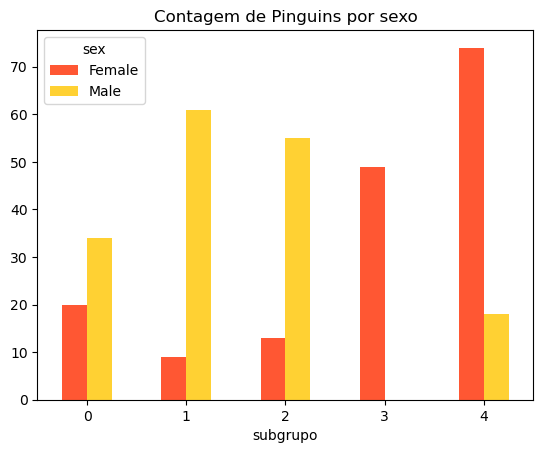

In [167]:
count_subgrupo.plot(kind='bar')

# Adicionar um título ao gráfico, definir a rotação dos rótulos no eixo x e exibir o gráfico de barras.
plt.title('Contagem de Pinguins por sexo')
plt.xticks(rotation=0)
plt.show()

C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

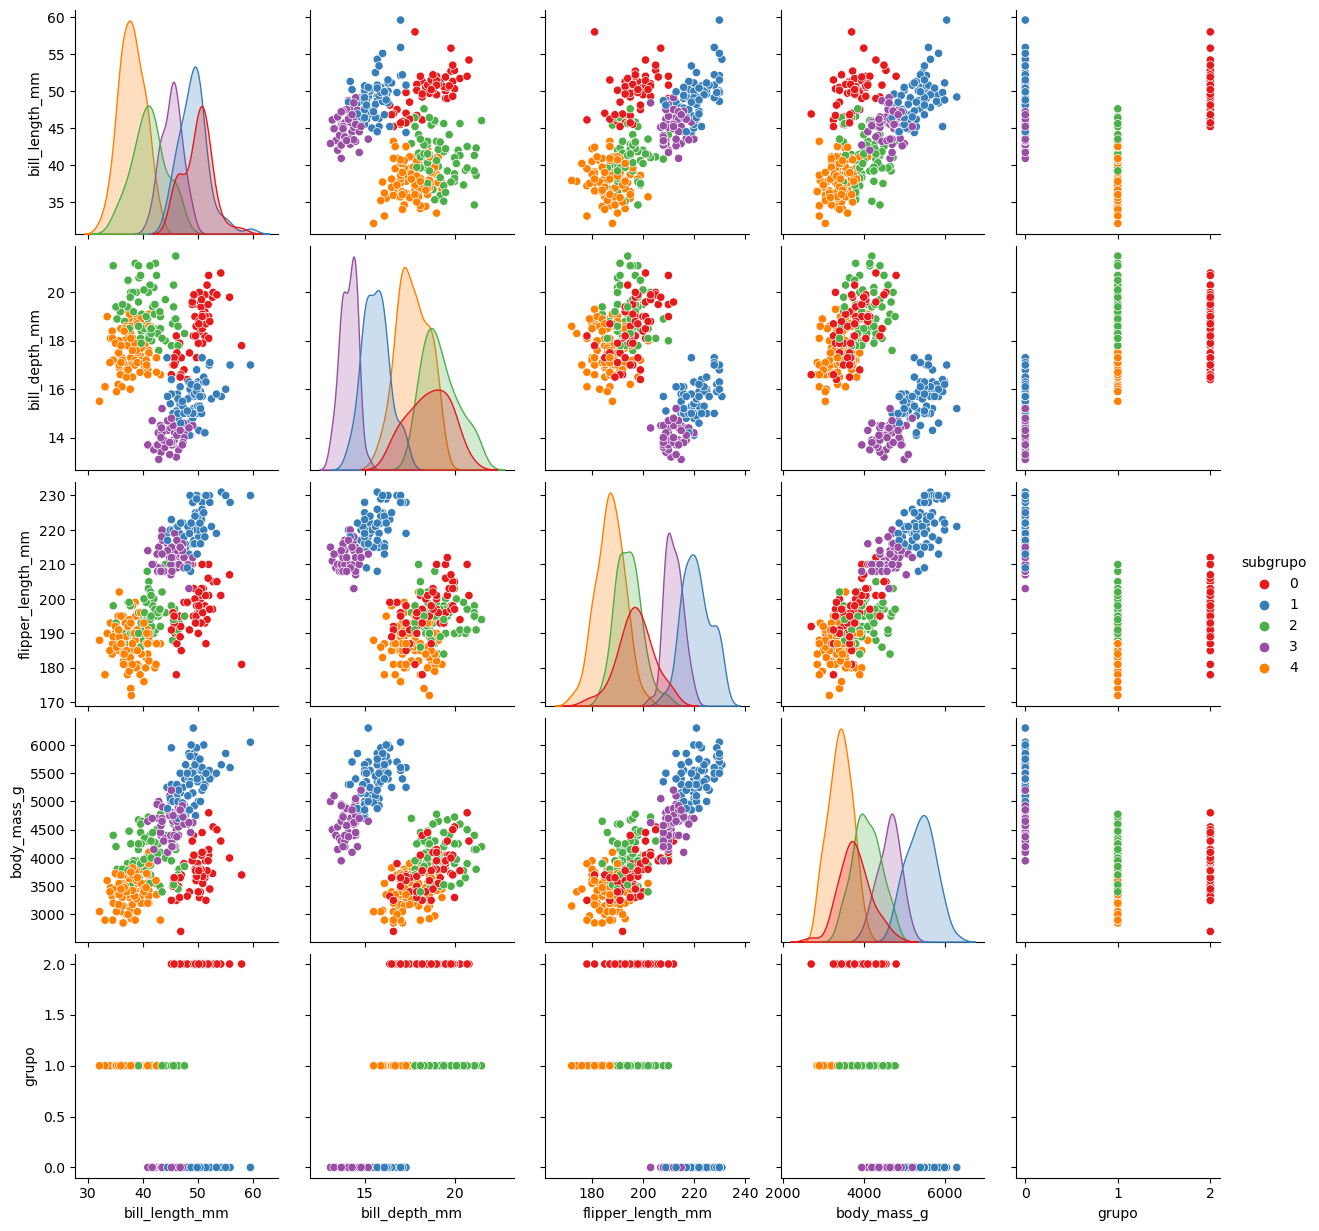

In [170]:
sns.pairplot(data=df_merg, hue='subgrupo', palette='Set1')

#### Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

> Precebemos que ao realizar seleção do modelo com 5 grupos, é notório que começamos a entrar com seleção de pequenos detalhes para selecionar determinados grupos. Quanto maior a ramificação, mais sensível a seleção de dados acaba se tornando e consequentemente mais complexo dependendo também sobre tudo o objetivo deste agrupamento.
>
> A seleção feita para o ```Grupo 0``` da espécie Chinstrap inclui perfeitamente a seleção de pinguins ```macho 10,2%``` e ```femeas 6%```, porém no ```Grupo 1``` da espécie Gentoo acaba dando preferência aos ```machos 18%``` enquanto as nesta seleção são apenas```femeas 3%```. Isso indica que o agrupamento foi capaz de separar os pinguins de forma mais detalhada e aprofundada, fazendo distinção mais complexas entre os grupos.